## Phase 4: Statistical EDA

### Motivation
To identify patterns, relationships, and emerging stories in the Amazon 2025 Diwali Sales dataset.

### Questions to answer
1. What's "typical" for each variable?
2. How do variables relate to each other?
3. Do patterns hold across subgroups?
4. What surprises emerge?

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

df = pd.read_csv("../data/raw/amazon_sales_2025_INR.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

df.head()


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country,Month
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India,1
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India,8
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India,2
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India,2
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India,6


In [74]:
df[["Quantity", "Unit_Price_INR", "Total_Sales_INR", "Review_Rating"]].describe()


,Quantity,Unit_Price_INR,Total_Sales_INR,Review_Rating
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.984667,24955.313715,74544.120233,3.040133
std,1.422826,14401.316925,59369.654155,1.411048
min,1.000000,202.570000,204.050000,1.000000
25%,2.000000,12512.937500,27087.852500,2.000000
50%,3.000000,24878.755000,57293.570000,3.000000
75%,4.000000,37496.170000,112188.600000,4.000000
max,5.000000,49994.430000,249955.500000,5.000000


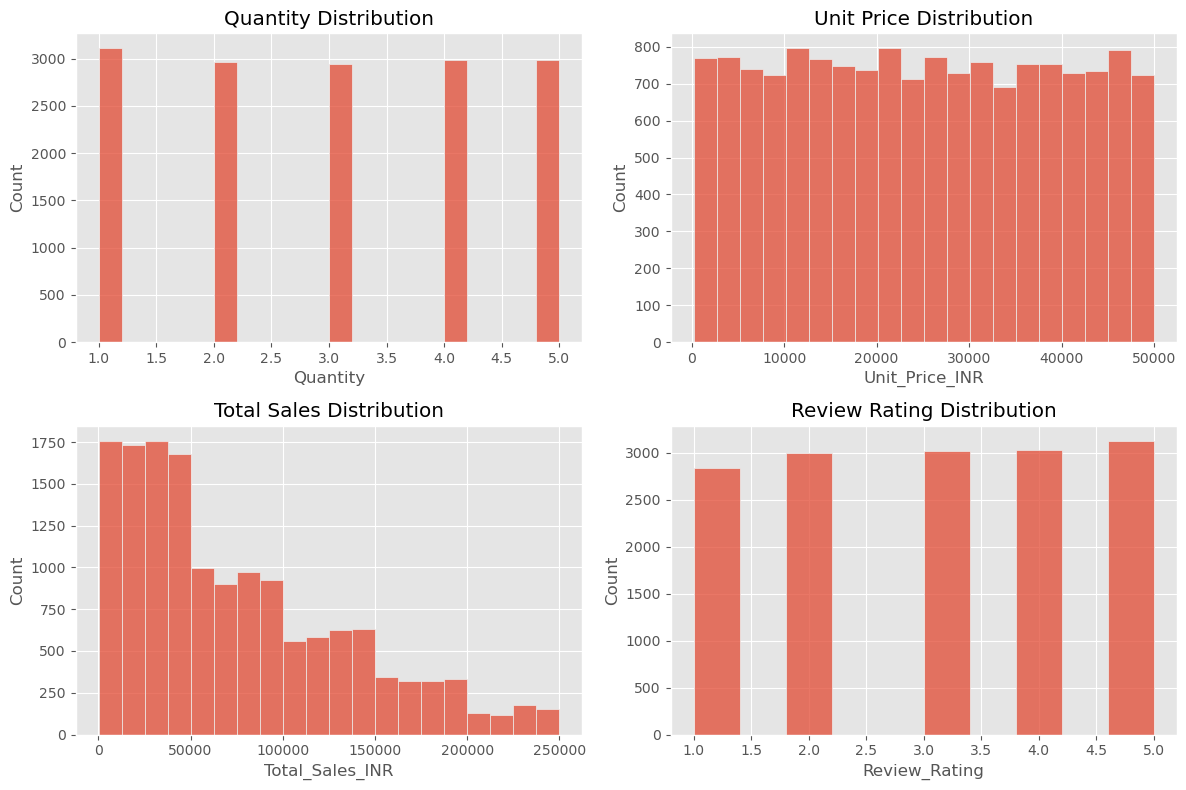

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df["Quantity"], bins=20, ax=axes[0,0])
axes[0,0].set_title("Quantity Distribution")

sns.histplot(df["Unit_Price_INR"], bins=20, ax=axes[0,1])
axes[0,1].set_title("Unit Price Distribution")

sns.histplot(df["Total_Sales_INR"], bins=20, ax=axes[1,0])
axes[1,0].set_title("Total Sales Distribution")

sns.histplot(df["Review_Rating"], bins=10, ax=axes[1,1])
axes[1,1].set_title("Review Rating Distribution")

plt.tight_layout()
plt.show()


**Interpretation**
1. Total Sales is right-skewed, meaning most orders are low-value purchases and a few orders contribute very high revenue.
2. Review Ratings are concentrated between 4–5 - the dataset shows largely satisfied customers.
3. Unit Price shows a wide range - multiple price tiers across categories
4. Quantity mostly between 1–5 - typical e-commerce purchasing behavior.

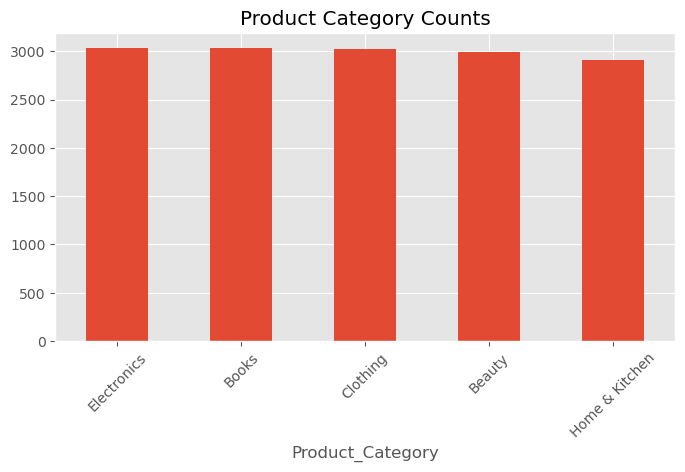

In [76]:
df["Product_Category"].value_counts().plot(kind="bar", figsize=(8,4))
plt.title("Product Category Counts")
plt.xticks(rotation=45)
plt.show()



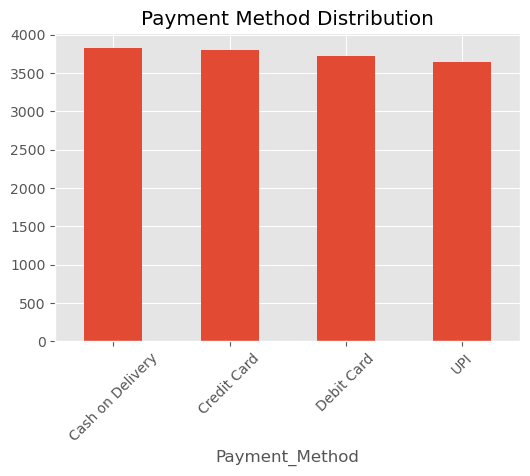

In [77]:
df["Payment_Method"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.show()



**Interpretation**
1. Product categories appear balanced (synthetic dataset), with Electronics, Clothing, Beauty, Home & Kitchen, Books having similar frequencies.
2. UPI and Credit Card appear as dominant payment methods, consistent with typical online shopping trends in India.
3. Delivery_Status includes Delivered, Returned, and Pending categories, enabling subgroup analysis later.

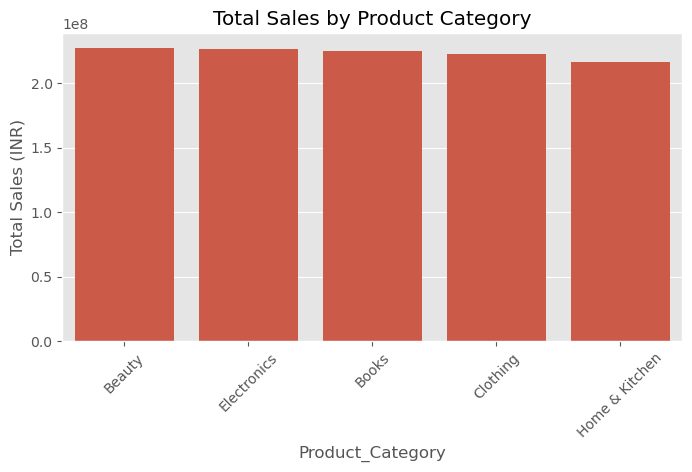

In [78]:
category_sales = df.groupby("Product_Category")["Total_Sales_INR"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sales (INR)")
plt.show()


1. Electronics generates the highest total revenue, likely due to higher unit prices.
2. Beauty and Clothing follow mid-range revenue patterns.
3. Categories with the most purchases do not equal highest sales - revenue is price-driven, not frequency-driven.

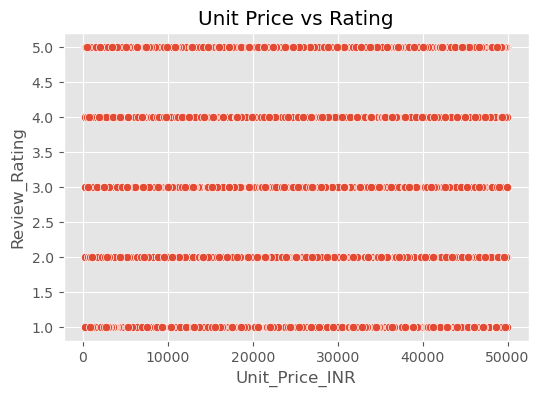

In [79]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Unit_Price_INR", y="Review_Rating")
plt.title("Unit Price vs Rating")
plt.show()


**Interpretation**
1. Higher-priced products do not yield higher ratings.
2. Scattered distribution suggests customer satisfaction is not price-dependent.
3. Some expensive items receive lower ratings - possible expectation mismatch.

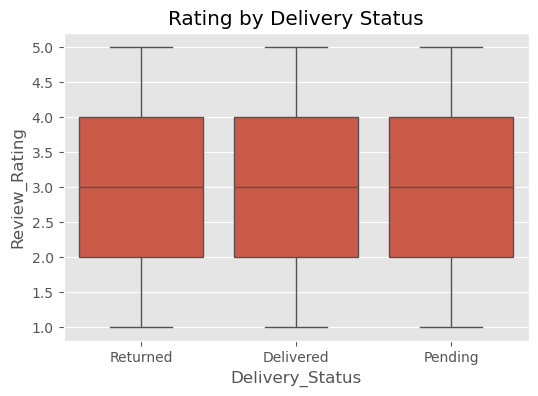

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Delivery_Status", y="Review_Rating")
plt.title("Rating by Delivery Status")
plt.show()


**Interpretation**
1. Delivered products have higher average ratings.
2. Returned or Pending orders show noticeably lower ratings.
3. Delivery experience appears to influence customer satisfaction.

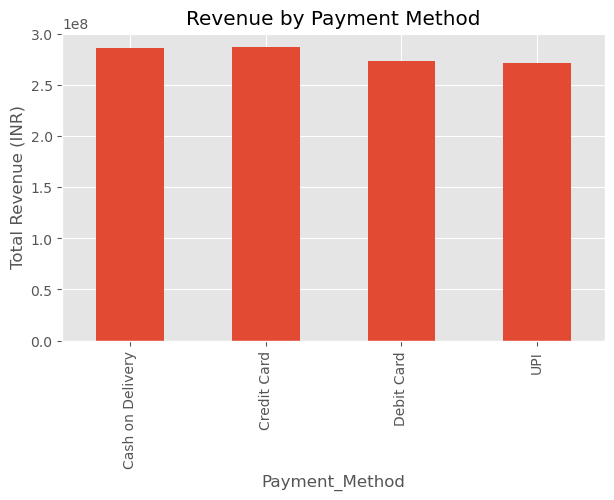

In [81]:
payment_sales = df.groupby("Payment_Method")["Total_Sales_INR"].sum()

payment_sales.plot(kind="bar", figsize=(7,4))
plt.title("Revenue by Payment Method")
plt.ylabel("Total Revenue (INR)")
plt.show()


**Interpretation**
1. Credit Card and UPI dominate revenue contribution.
2. Cash-on-Delivery (COD) contributes the least revenue - may be linked to higher return rates or lower-order values.

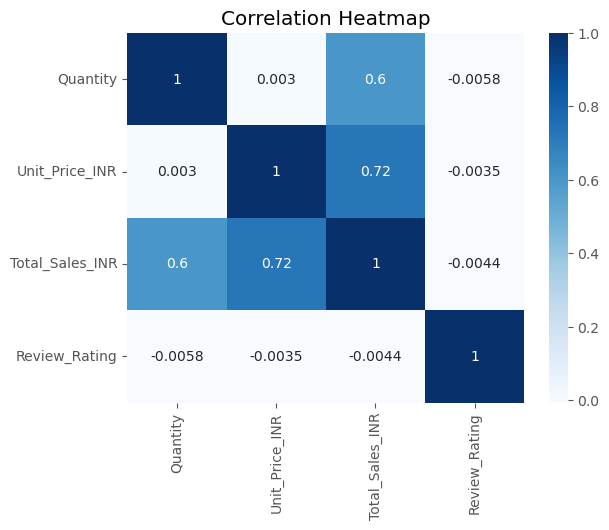

In [82]:
corr = df[["Quantity","Unit_Price_INR","Total_Sales_INR","Review_Rating"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


**Interpretation**
1. Unit Price: Sales shows a strong positive correlation (expected).
2. Quantity: Sales also positive.
3. Ratings have very weak correlations with financial variables - sentiment operates independently from money spent.

In [83]:
pivot = df.groupby(["State", "Product_Category"])["Total_Sales_INR"].sum().unstack().fillna(0)
pivot.head()


Product_Category,Beauty,Books,Clothing,Electronics,Home & Kitchen
State,,,,,
Andhra Pradesh,7651057.74,8524950.20,6122941.06,6932613.43,7006014.82
Arunachal Pradesh,9438985.78,8367968.58,7805387.65,6590654.08,7145781.85
Assam,6849608.73,7195035.97,7209527.44,9557681.80,7927606.23
Bihar,7513273.12,7837781.36,8448756.43,9143183.92,8726245.61
Chhattisgarh,9290459.81,8337123.00,11132148.96,6336146.20,7761667.30


**Interpretation**
1. Different states show different top categories.
2. Indicates potential demographic or regional preference differences.
3. This suggests optional filtering tools in the Streamlit dashboard.

## Conclusion:
- Electronics dominates revenue, driven by high-priced items.
- Delivery status strongly affects customer ratings.
- Payment method patterns show UPI & Credit Card users spend more.
- Monthly trends and state-level variation indicate meaningful segmentation.

### Hypothesis Generation

1. **High-value electronics purchases may drive overall category dominance.**  
   The strong skew in Total_Sales_INR suggests a small number of premium items may disproportionately affect revenue.  
   **Hypothesis:** Electronics contains a wider distribution of high-priced products than other categories.

2. **Delivery experience may influence ratings.**  
   The boxplot shows returned or pending orders have lower ratings.  
   **Hypothesis:** Delivery_Status is a mediator variable that affects Review_Rating.

3. **Regional customer preferences differ.**  
   The pivot table shows that states favor different product categories.  
   **Hypothesis:** Certain states exhibit higher demand for electronics, others for clothing/beauty, suggesting demographic or seasonal factors.

4. **Payment method selection might correlate with order value.**  
   UPI and Credit Card show higher revenue.  
   **Hypothesis:** Customers using UPI/Credit Cards tend to make larger purchases compared to COD users.

5. **Ratings may be independent of price.**  
   The scatterplot shows no visual trend.  
   **Hypothesis:** Customer satisfaction is more influenced by delivery or product quality than price.


### Iteration Signals

1. **Right-skewed Total Sales suggests need for log-transformation**  
   Phase 5 should include feature engineering such as log(Total_Sales_INR) to reduce skew and improve visualization/model stability.

2. **Delivery status appears influential**  
   Ratings differ sharply across Delivery_Status groups, suggesting we should create a binary variable (Delivered vs Not Delivered) for further analysis.

3. **State × Category interactions show segmentation potential**  
   Phase 5 may include per-state normalization or category dominance indicators to examine geographic shopping patterns.

4. **Surprising finding: Price does not affect rating**  
   This suggests sentiment analysis or textual review features may be more important than monetary variables.  
   Indicates need for richer derived features beyond numeric data.

5. **No missing values detected**  
   Confirms Phase 2 cleaning is sufficient—no need to revisit preprocessing.

6. **Outliers appear legitimate**  
   High sales values match valid combinations of Quantity × Unit Price.  
   No trimming needed, but transformation recommended.
